In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [2]:
with open('all_epochs.npy', 'rb') as f:
    X = np.load(f)
    
with open('all_labels.npy', 'rb') as f:
    y = np.load(f)

X.shape, y.shape

X = X[:,:,:,None]

np.random.shuffle(X)
np.random.shuffle(y)

X.shape

X_true = X[y == 1,:,:,:]
print(X_true.shape)

y_true = y[y==1]
y_false = y[y==0]
X_false = X[y== 0 ,:,:,:]
y_false = y_false[:5000]
X_false = X_false[:5000,:,:,:]

X_down = np.concatenate((X_true,X_false), axis = 0)
y_down = np.concatenate((y_true,y_false), axis = 0)

print(X_false.shape)
print(X_down.shape, y_down.shape)

(2404, 16, 45, 1)
(5000, 16, 45, 1)
(7404, 16, 45, 1) (7404,)


In [3]:
def build_model(use_batchnorm=False, dropout_rate=0.):
  layers = []

  layers.append(tf.keras.layers.Flatten(input_shape=(16, 45, 1)))
  if use_batchnorm: layers.append(tf.keras.layers.BatchNormalization())
  if dropout_rate > 0: layers.append(tf.keras.layers.Dropout(dropout_rate))


  layers.append(tf.keras.layers.Dense(128, activation = 'relu'))
  if use_batchnorm: layers.append(tf.keras.layers.BatchNormalization())
  if dropout_rate > 0: layers.append(tf.keras.layers.Dropout(dropout_rate))

  layers.append(tf.keras.layers.Dense(128, activation = 'relu'))
  if use_batchnorm: layers.append(tf.keras.layers.BatchNormalization())
  if dropout_rate > 0: layers.append(tf.keras.layers.Dropout(dropout_rate))

  layers.append(tf.keras.layers.Dense(2))
  

  model = tf.keras.Sequential(layers)
  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.metrics.SparseCategoricalAccuracy()])
  return model

In [7]:
model_nor = build_model(True, 0.4)
model_nor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 720)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 720)               2880      
_________________________________________________________________
dropout_3 (Dropout)          (None, 720)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               92288     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [17]:
model_nor.fit(X_down, y_down, epochs=40)

test_loss, test_acc = model_nor.evaluate(X,  y, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/40
232/232 [==============================] - 1s 3ms/step - loss: 0.5004 - sparse_categorical_accuracy: 0.7569
Epoch 2/40
232/232 [==============================] - 1s 3ms/step - loss: 0.4967 - sparse_categorical_accuracy: 0.7597
Epoch 3/40
232/232 [==============================] - 1s 3ms/step - loss: 0.4990 - sparse_categorical_accuracy: 0.7576
Epoch 4/40
232/232 [==============================] - 1s 3ms/step - loss: 0.4984 - sparse_categorical_accuracy: 0.7589
Epoch 5/40
232/232 [==============================] - 1s 3ms/step - loss: 0.4996 - sparse_categorical_accuracy: 0.7538
Epoch 6/40
232/232 [==============================] - 1s 3ms/step - loss: 0.4959 - sparse_categorical_accuracy: 0.7577
Epoch 7/40
232/232 [==============================] - 1s 3ms/step - loss: 0.4996 - sparse_categorical_accuracy: 0.7545
Epoch 8/40
232/232 [==============================] - 1s 3ms/step - loss: 0.4980 - sparse_categorical_accuracy: 0.7612
Epoch 9/40
232/232 [============================

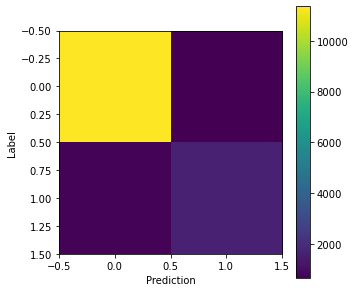

tf.Tensor(
[[11354   666]
 [  765  1639]], shape=(2, 2), dtype=int32)


In [18]:
y_pred = np.argmax(model_nor.predict(X), axis=1)
y_true = y



confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(5, 5))

plt.imshow(confusion_mtx)


plt.xlabel('Prediction')
plt.ylabel('Label')
plt.colorbar()
plt.show()

print(confusion_mtx)

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

print('f1 score: ', f1_score(y_true, y_pred))
print('roc_auc score: ', roc_auc_score(y_true, y_pred))

f1 score:  0.6961138245912083
roc_auc score:  0.8131863560732113
